In [1]:
import numpy as np  
from matplotlib import pyplot
import pandas as pd    
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function
import math # log function is inside this library
from sklearn import metrics


import itertools
from sklearn.utils import resample

from scipy.stats import zscore
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import cophenet,dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from scipy.spatial.distance import pdist
from sklearn.metrics import silhouette_samples, silhouette_score


### Background

AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalised campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the back poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customers queries are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help.

### Objective

To identify different segments in the existing customer based on their spending patterns as well as past interaction with the bank. 

### Key questions

1.	How many different segments of customers are there?
2.	How are these segments different from each other?
3.	What are your recommendations to the bank on how to better market to and service these customers?


#### Import data

In [2]:
df_data = pd.read_excel('Credit Card Customer Data.xlsx') 

### Exploratory data quality report 

#### 1.	Univariate analysis

In [3]:
# initial inspection
df_data

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
...,...,...,...,...,...,...,...
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0


In [4]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


Both SI_No and Customer Key can be removed from the clustering excersise since these variables do not contain any information. They can be replaced after clustering in case they have some business application/value.

In [5]:
df_data_attr=df_data.iloc[:,2:]

In [6]:
df_data_attr

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3
...,...,...,...,...,...
655,99000,10,1,10,0
656,84000,10,1,13,2
657,145000,8,1,9,1
658,172000,10,1,15,0


<b>Name -- Data Type -- Description</b><br>
•	Avg_Credit_Limi -- integer, numeric -- Input Variable<br>
•	Total_Credit_Cards -- integer, numeric -- Input Variable<br>
•	Total_visits_bank -- integer, numeric -- Input Variable<br>
•	Total_visits_online -- integer, numeric -- Input Variable<br>
•	Total_calls_made -- integer, numeric -- Input Variable<br>

In [7]:
# data types

df_data_attr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Avg_Credit_Limit     660 non-null    int64
 1   Total_Credit_Cards   660 non-null    int64
 2   Total_visits_bank    660 non-null    int64
 3   Total_visits_online  660 non-null    int64
 4   Total_calls_made     660 non-null    int64
dtypes: int64(5)
memory usage: 25.9 KB


Note:

660 rows, 5 columns. There are no null values in the data.

In [8]:
df_data_attr.isnull().sum()

Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [9]:
# detail inspection
df_data_attr.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.0,18000.0,48000.0,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.0,5.0,6.0,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.0,2.0,4.0,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.0,2.0,4.0,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.0,3.0,5.0,10.0


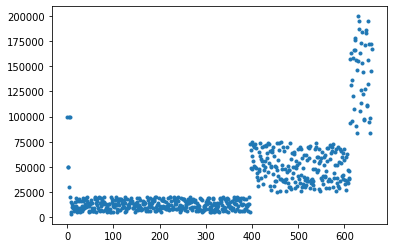

In [10]:
plt.plot(df_data_attr.Avg_Credit_Limit,'.')

Note: This looks like the data was sampled in three distinct groups, with different creadit limit bands. This might be an indication that the customers can be clustered into three groups.

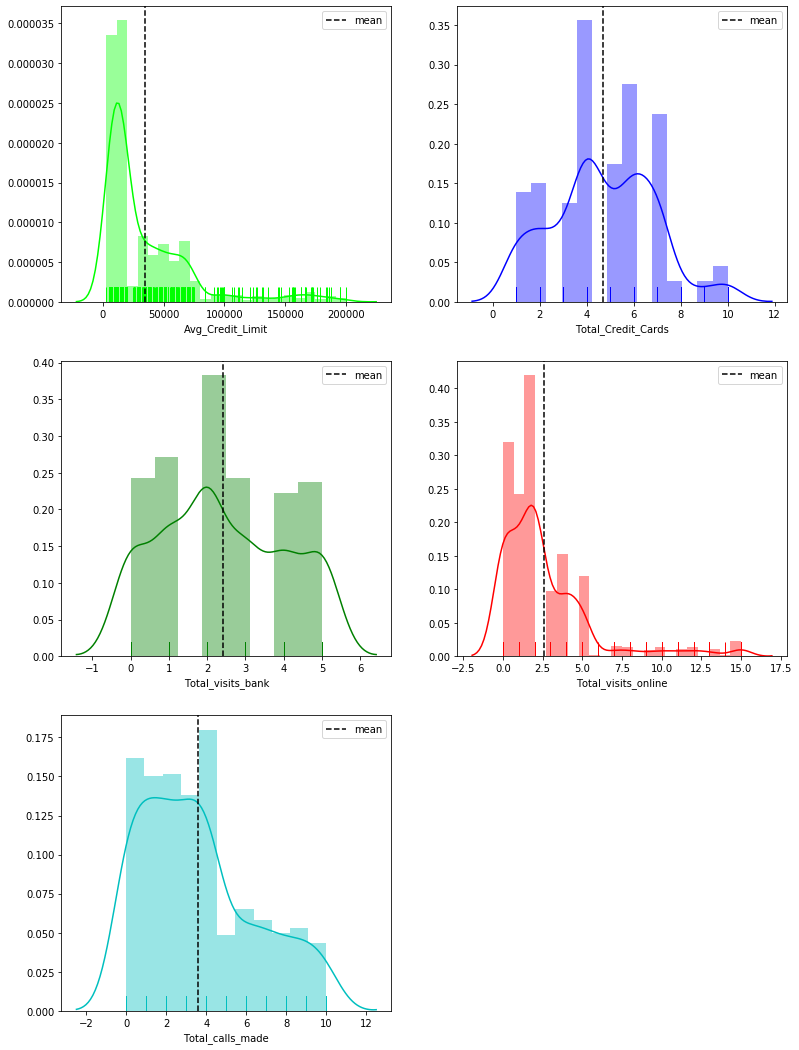

In [11]:
column_list = df_data_attr.columns
cols = column_list.to_list()

colors = ["lime","b","g","r","c"]
fig = plt.figure(figsize=(13,25))

for i,j,k in itertools.zip_longest(cols,range(len(cols)),colors):
    plt.subplot(4,2,j+1)
    ax = sns.distplot(df_data_attr[i],color=k,rug=True)
    ax.set_facecolor("w")
    plt.axvline(df_data_attr[i].mean(),linestyle="dashed",label="mean",color="k")
    plt.legend(loc="best")

#### Comments: 

The distributions of Avg_Credit_Limit and Total_visits_online are skewed. <br>
The other distributions are closer to normal, with a few distinct gausians. <br>

#### Swarm plot

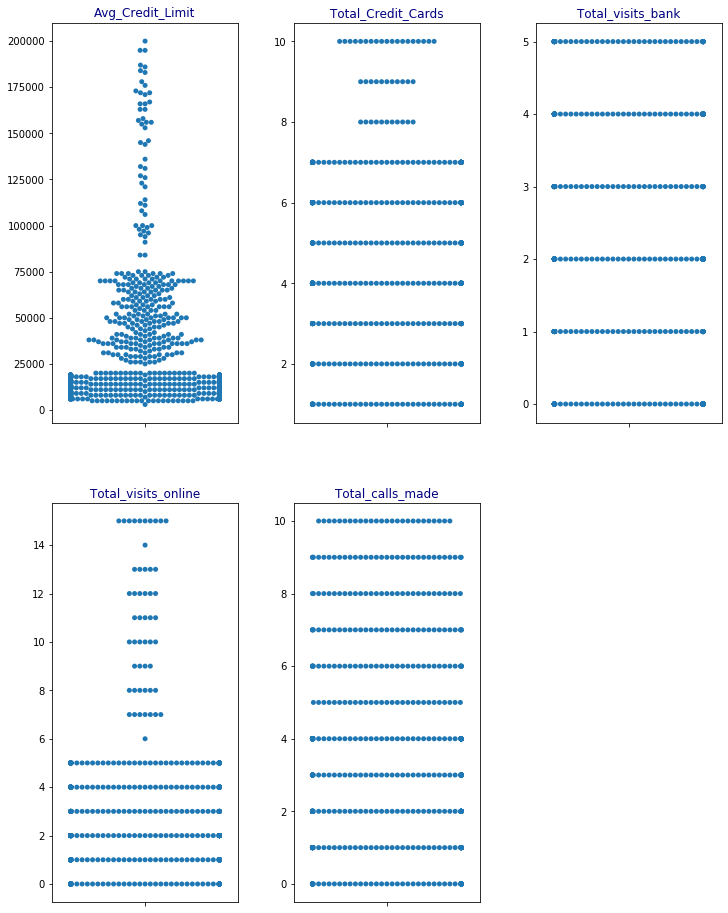

In [12]:
plt.figure(figsize=(12,25))

for i,j in itertools.zip_longest(column_list,range(len(column_list))):
    
    plt.subplot(3,3,j+1)
    ax = sns.swarmplot( y = df_data_attr[i])
    ax.set_ylabel("")
    ax.set_title(i,color="navy")
    plt.subplots_adjust(wspace = .3)

The swarm plot of Average_Credit_Limit again indicates that he data might be clustered into 3 groups.

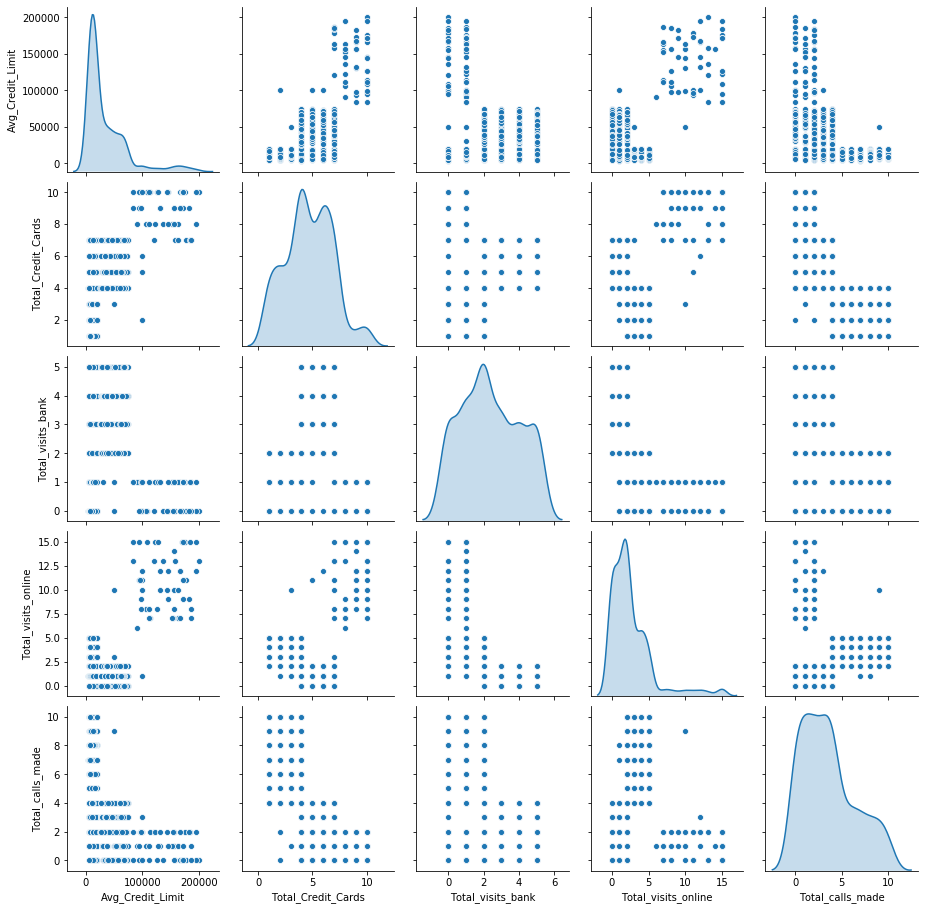

In [13]:
sns.pairplot(df_data_attr, diag_kind = 'kde', palette="husl")

Note:

The histograms in the pairplot show that there are a few gaussians in the data. From the distributions it looks like there might be three or four.

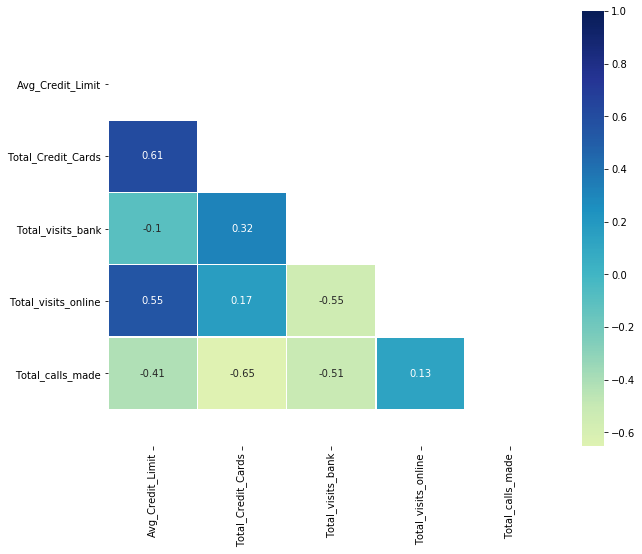

In [14]:
plt.figure(figsize=(10,8))

cor = df_data_attr.corr()
mask = np.zeros_like(cor)
mask[np.triu_indices_from(mask)] = True
ax = sns.heatmap(cor,
            annot=True,
            linewidths=.5,
            center=0,
            cmap="YlGnBu",
                mask = mask)

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

Note:

There are no very strong correlations between any of the variables.

Investigate variable distributions using boxplots.

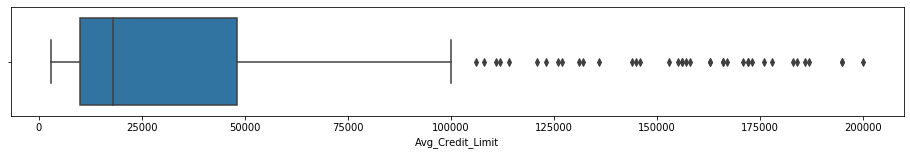

In [15]:
plt.figure(figsize=(16, 2))
sns.boxplot('Avg_Credit_Limit',data=df_data_attr)

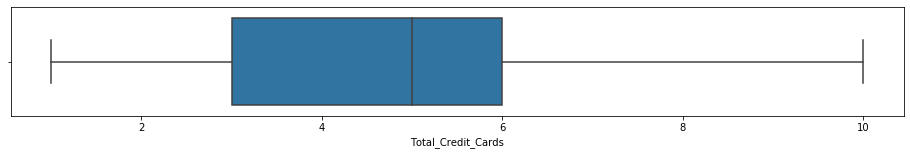

In [16]:
plt.figure(figsize=(16, 2))
sns.boxplot('Total_Credit_Cards',data=df_data_attr)

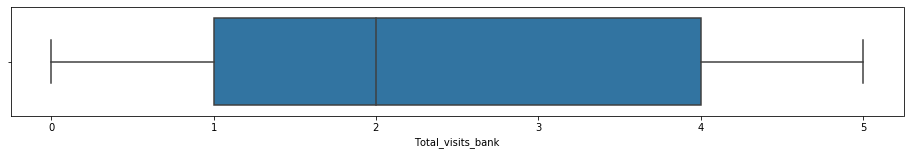

In [17]:
plt.figure(figsize=(16, 2))
sns.boxplot('Total_visits_bank',data=df_data_attr)

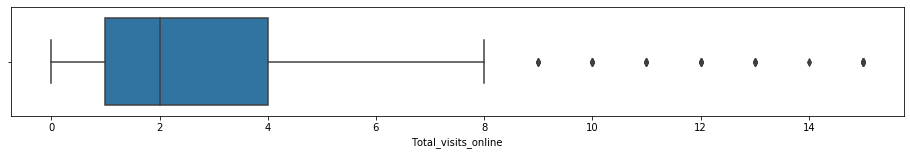

In [18]:
plt.figure(figsize=(16, 2))
sns.boxplot('Total_visits_online',data=df_data_attr)

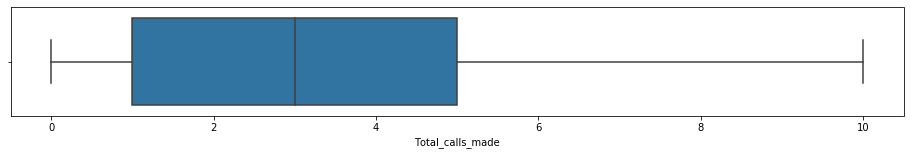

In [19]:
plt.figure(figsize=(16, 2))
sns.boxplot('Total_calls_made',data=df_data_attr)

#### Comments: 

Avg_Credit_Limit and Total_visits_online have outliers. 

Take logarithmic transforms for Avg_Credit_Limit. The outliers in Total_visits_online can be reomved by replacing them with the median, but due to the low number of datapoints this might add too much bias. The number of outliers is also relativly low.

In [20]:
df_data_attr['Avg_Credit_Limit_lt'] = np.log(df_data_attr['Avg_Credit_Limit'])

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
df_data_attr

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Avg_Credit_Limit_lt
0,100000,2,1,1,0,11.512925
1,50000,3,0,10,9,10.819778
2,50000,7,1,3,4,10.819778
3,30000,5,1,1,4,10.308953
4,100000,6,0,12,3,11.512925
...,...,...,...,...,...,...
655,99000,10,1,10,0,11.502875
656,84000,10,1,13,2,11.338572
657,145000,8,1,9,1,11.884489
658,172000,10,1,15,0,12.055250


In [22]:
df_data_attr_d = df_data_attr.drop('Avg_Credit_Limit',axis=1)

View data distribution with boxplot.

[Text(0, 0, 'Total_Credit_Cards'),
 Text(0, 0, 'Total_visits_bank'),
 Text(0, 0, 'Total_visits_online'),
 Text(0, 0, 'Total_calls_made'),
 Text(0, 0, 'Avg_Credit_Limit_lt')]

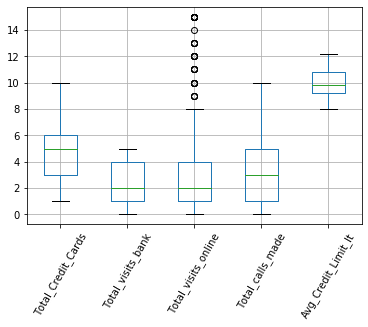

In [23]:
bplot = df_data_attr_d.boxplot()
bplot.set_xticklabels(bplot.get_xticklabels(), rotation=60)

#### K-means clustering

Scale data using zscore

In [24]:
df_data_attr_sc = df_data_attr_d.apply(zscore)

In [25]:
df_data_attr_sc

,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Avg_Credit_Limit_lt
0,-1.249225,-0.860451,-0.547490,-1.251537,1.630478
1,-0.787585,-1.473731,2.520519,1.891859,0.885387
2,1.058973,-0.860451,0.134290,0.145528,0.885387
3,0.135694,-0.860451,-0.547490,0.145528,0.336281
4,0.597334,-1.473731,3.202298,-0.203739,1.630478
...,...,...,...,...,...
655,2.443892,-0.860451,2.520519,-1.251537,1.619674
656,2.443892,-0.860451,3.543188,-0.553005,1.443058
657,1.520613,-0.860451,2.179629,-0.902271,2.029885
658,2.443892,-0.860451,4.224968,-1.251537,2.213443


Create clusters in order to draw elbow plot

In [26]:
cluster_range = range(1,15)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters, n_init = 5)
    clusters.fit(df_data_attr_sc)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)

clusters_df = pd.DataFrame({"num_clusters": cluster_range, "cluster_errors": cluster_errors})
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,3300.000000
1,2,1980.654971
2,3,1090.350994
3,4,860.748318
4,5,775.802835
5,6,697.737239
6,7,634.306961
7,8,607.166768
8,9,570.657346
9,10,545.757189


Draw elbow plot.

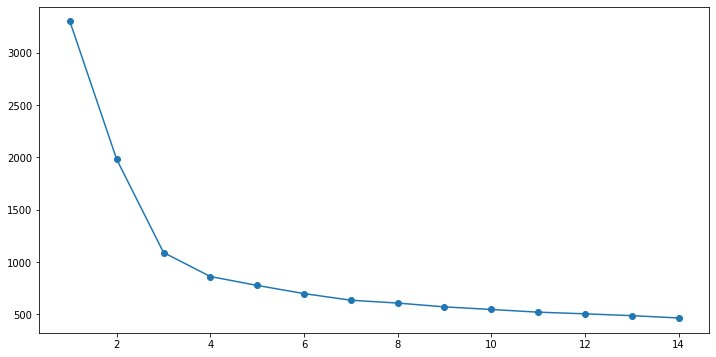

In [27]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

From the elbow plot it looks like either 3 or 4 clusters would be good options for clustering. We'll analyse both three and four clusters.

In [28]:
cluster_range = range(1,200)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters, n_init = 5)
    clusters.fit(df_data_attr_sc)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)

clusters_df = pd.DataFrame({"num_clusters": cluster_range, "cluster_errors": cluster_errors})
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,3300.000000
1,2,1980.654971
2,3,1090.350994
3,4,860.748318
4,5,775.816017
5,6,697.695144
6,7,634.212081
7,8,599.114102
8,9,580.565081
9,10,545.835799


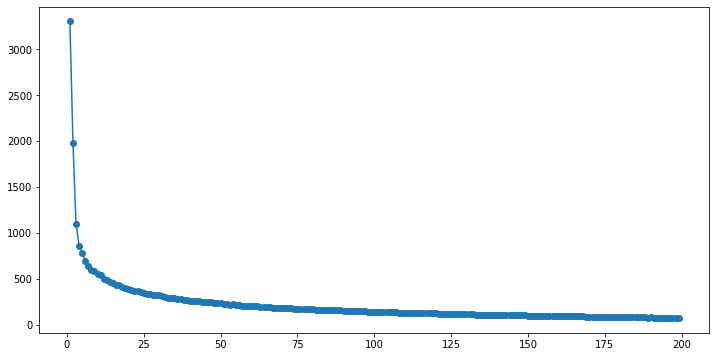

In [29]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

Do analysis with three clusters:

In [189]:
three_model=KMeans(3)
three_model.fit(df_data_attr_sc)
prediction=three_model.predict(df_data_attr_sc)

#Append the prediction
df_data_three_groups = df_data_attr.copy()
df_data_three_groups["GROUP"] = prediction
df_data_attr_sc["GROUP"] = prediction
df_data_three_groups.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Avg_Credit_Limit_lt,GROUP
0,100000,2,1,1,0,11.512925,1
1,50000,3,0,10,9,10.819778,2
2,50000,7,1,3,4,10.819778,1
3,30000,5,1,1,4,10.308953,1
4,100000,6,0,12,3,11.512925,0


In [190]:
labels = three_model.labels_
counts = np.bincount(labels[labels>=0])
print(counts)

[ 50 385 225]


In [191]:
three_groups_clusters = df_data_three_groups.groupby(['GROUP'])
three_groups_clusters.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Avg_Credit_Limit_lt
GROUP,,,,,,
0,141040.000000,8.740000,0.600000,10.900000,1.080000,11.825513
1,33851.948052,5.516883,3.493506,0.979221,1.994805,10.155951
2,12151.111111,2.422222,0.937778,3.546667,6.857778,9.316085


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EBE0E3FB08>,
      dtype=object)

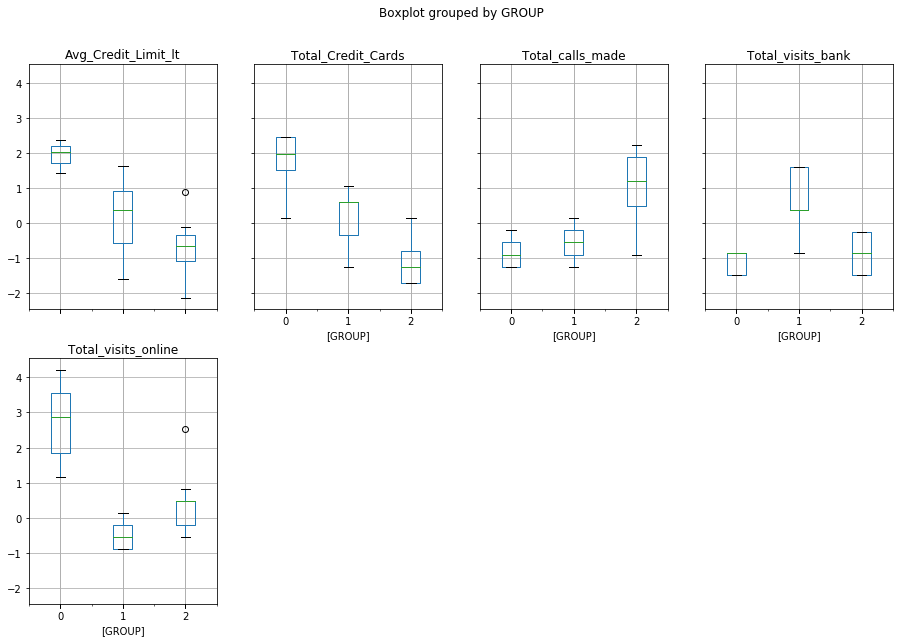

In [192]:
df_data_attr_sc.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

Comments:

Group 0 - highest visits to the bank, lowest visits online<br>
Group 1 - highest average credit limit, most credit cards, highest visits online, lowest visits to the bank<br>
Group 2 - lowest average credit limit, lowest nr credit cards, highest total calls made<br>


Do analysis with four clusters:

In [193]:
four_model=KMeans(4)
four_model.fit(df_data_attr_sc)
prediction_four=four_model.predict(df_data_attr_sc)

#Append the prediction
df_data_four_groups = df_data_attr.copy()
df_data_four_groups["GROUP"] = prediction_four
df_data_attr_sc["GROUP"] = prediction_four
df_data_four_groups.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Avg_Credit_Limit_lt,GROUP
0,100000,2,1,1,0,11.512925,0
1,50000,3,0,10,9,10.819778,1
2,50000,7,1,3,4,10.819778,0
3,30000,5,1,1,4,10.308953,0
4,100000,6,0,12,3,11.512925,3


In [194]:
labels_four = four_model.labels_
counts = np.bincount(labels_four[labels_four>=0])
print(counts)

[219 224 167  50]


In [195]:
four_groups_clusters = df_data_four_groups.groupby(['GROUP'])
four_groups_clusters.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Avg_Credit_Limit_lt
GROUP,,,,,,
0,50187.214612,5.547945,3.401826,0.968037,2.054795,10.776538
1,12174.107143,2.410714,0.933036,3.553571,6.870536,9.318149
2,12269.461078,5.473054,3.604790,1.000000,1.928144,9.334330
3,141040.000000,8.740000,0.600000,10.900000,1.080000,11.825513


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EBE1BA8D08>,
      dtype=object)

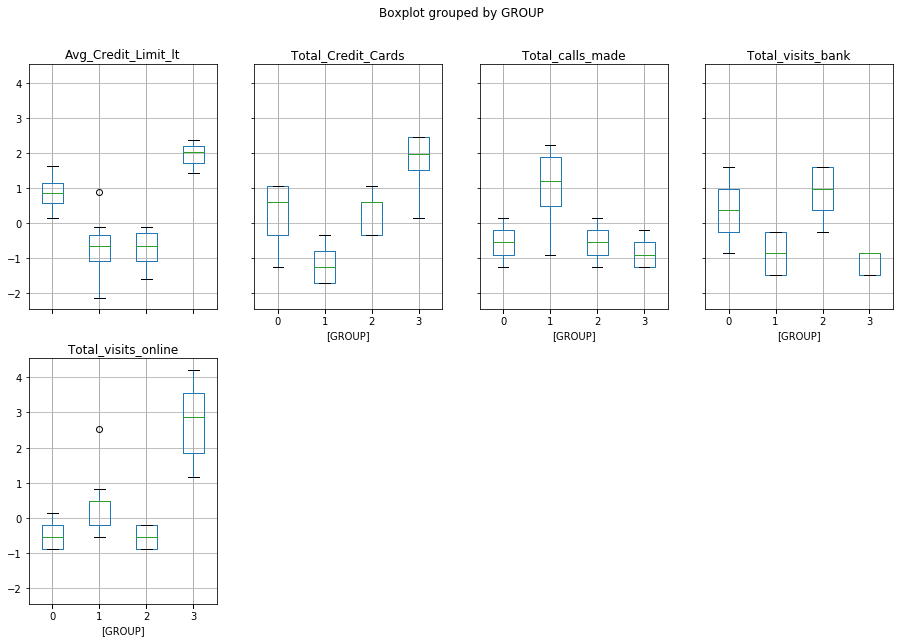

In [196]:
df_data_attr_sc.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

From visual inspection the clustering of the four groups provides less distinct groups, therefor the clustering of three would be preferred.

##### Silhouette Analysis

Silhouette analysis can be used to determine the degree of separation between clusters. A silhouette analysis will be done for clusters of 3,4 and 5.

If the coefficient is 0 –> the sample is very close to the neighboring clusters.<br>
It the coefficient is 1 –> the sample is far away from the neighboring clusters.<br>
It the coefficient is -1 –> the sample is assigned to the wrong clusters.<br>

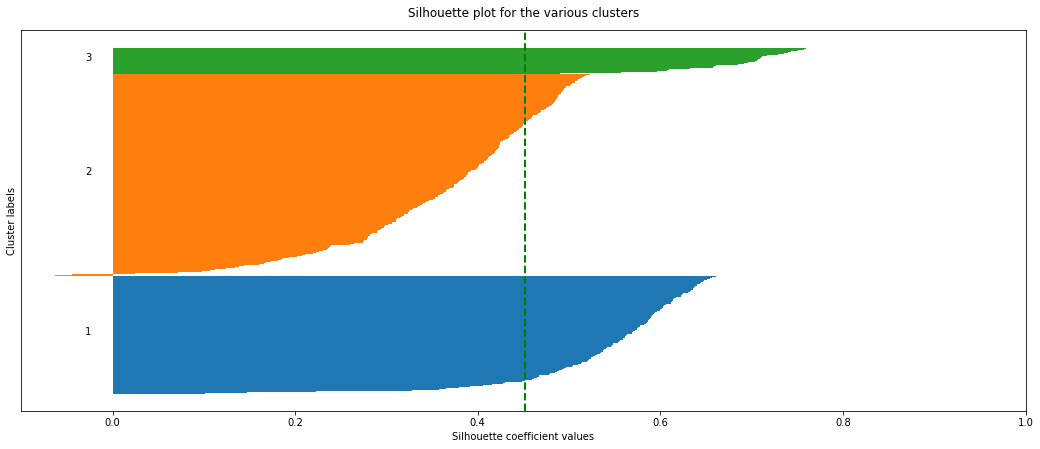

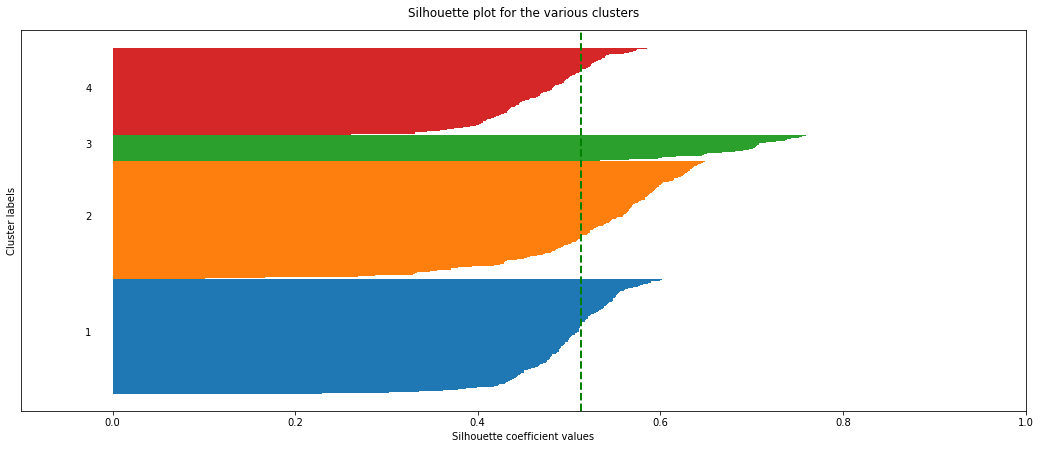

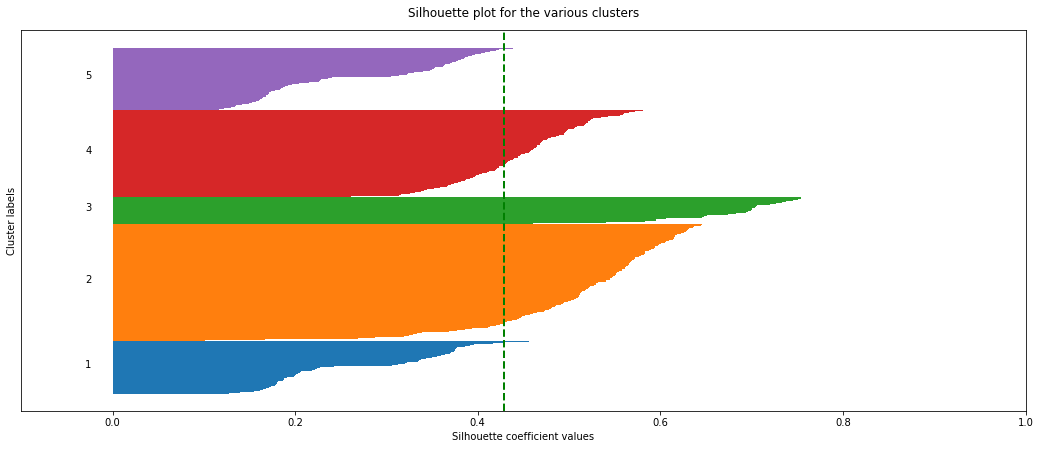

In [197]:
for i, k in enumerate([3, 4, 5]):
    fig, ax1 = plt.subplots(1)
    fig.set_size_inches(18, 7)
    
    # Run the Kmeans algorithm
    km = KMeans(n_clusters=k)
    labels = km.fit_predict(df_data_attr_sc)
    centroids = km.cluster_centers_

    # Get silhouette samples
    silhouette_vals = silhouette_samples(df_data_attr_sc, labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02);

The Silhouette Analysis indicates that 3 clusters has the best average silhouette score (around 0.5). Interestingly the plot for 5 shows that some of the items in cluster 1 is assigned to the wrong cluster.

#### Hierarchial clustering

In [198]:
df_data_attr_sc.drop('GROUP',axis=1,inplace=True)

In [199]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(df_data_attr_sc, metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(df_data_attr_sc))

c

0.8692987148428343

In [200]:
Z

array([[4.64000000e+02, 4.97000000e+02, 0.00000000e+00, 2.00000000e+00],
       [4.25000000e+02, 4.55000000e+02, 0.00000000e+00, 2.00000000e+00],
       [2.50000000e+02, 3.61000000e+02, 0.00000000e+00, 2.00000000e+00],
       ...,
       [1.00000000e+00, 1.30900000e+03, 3.07567737e+00, 2.20000000e+02],
       [1.31500000e+03, 1.31600000e+03, 3.40925108e+00, 6.10000000e+02],
       [1.31100000e+03, 1.31700000e+03, 4.96688355e+00, 6.60000000e+02]])

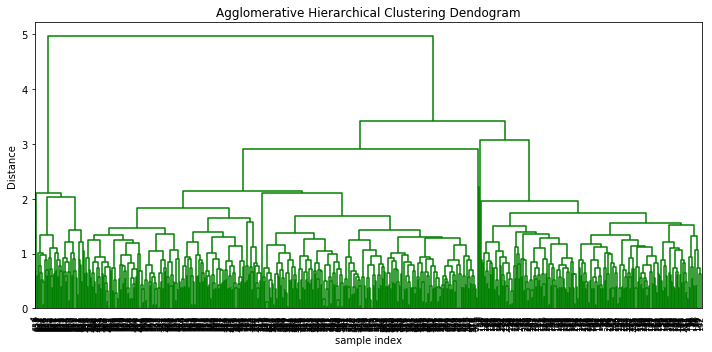

In [201]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

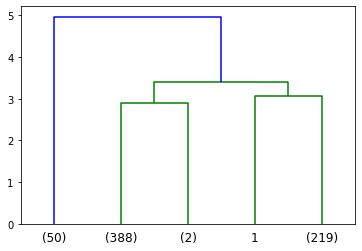

In [202]:
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=5,  # show only the last p merged clusters
)
plt.show()

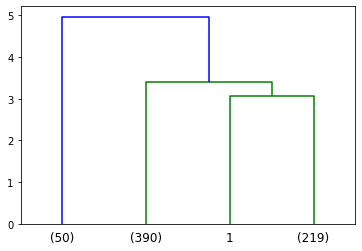

In [203]:
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=4,  # show only the last p merged clusters
)
plt.show()

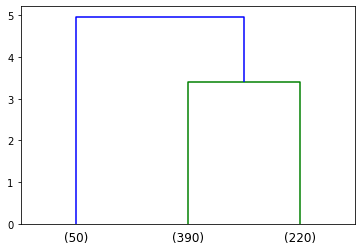

In [204]:
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=3,  # show only the last p merged clusters
)
plt.show()

From the dendograms with 5, 4, and 3 clusters it is evident that 3 clusters would be the most sensible. 5 and 4 clusters would result in some of the clusters containing very few samples.

Investigate other linkage methods:

In [205]:
Z_ward = linkage(df_data_attr_sc, metric='euclidean', method='ward')
c_ward, coph_dists_ward = cophenet(Z_ward , pdist(df_data_attr_sc))

c_ward

0.7464670063107975

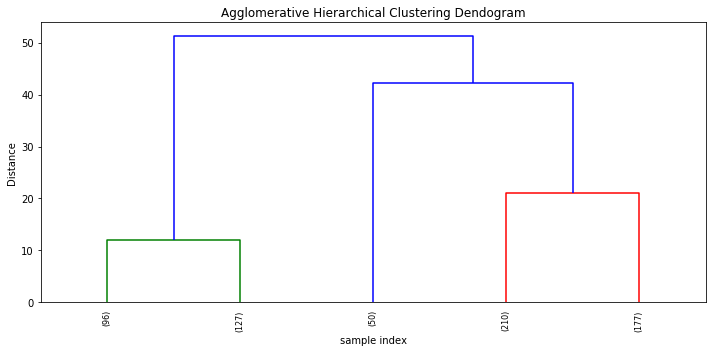

In [206]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z_ward, leaf_rotation=90.,truncate_mode='lastp',p=5, leaf_font_size=8. )
plt.tight_layout()

In [207]:
Z_comp = linkage(df_data_attr_sc, metric='euclidean', method='complete')
c_comp, coph_dists_comp = cophenet(Z_comp , pdist(df_data_attr_sc))

c_comp

0.8380834753160014

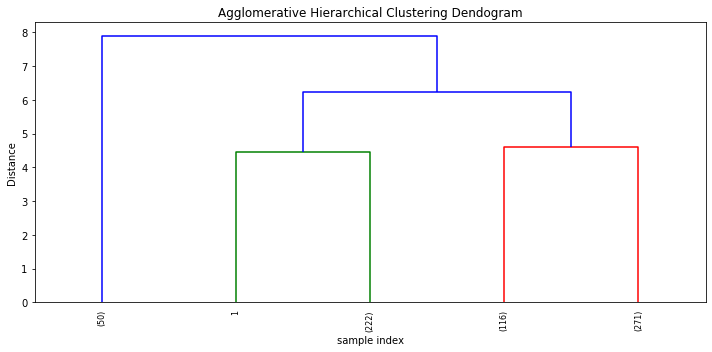

In [208]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z_comp, leaf_rotation=90.,truncate_mode='lastp',p=5, leaf_font_size=8. )
plt.tight_layout()

In [209]:
Z_cent = linkage(df_data_attr_sc, metric='euclidean', method='centroid')
c_cent, coph_dists_cent = cophenet(Z_cent , pdist(df_data_attr_sc))

c_cent

0.86841254357499

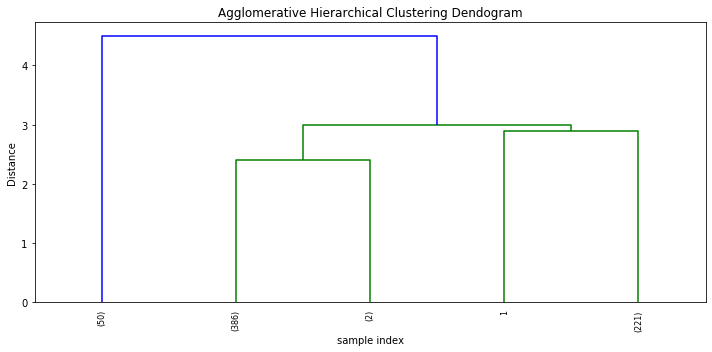

In [210]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z_cent, leaf_rotation=90.,truncate_mode='lastp',p=5, leaf_font_size=8. )
plt.tight_layout()

Comments:

The 'average' linkage method used initially gives the best cophenet index.

In [211]:
model_three = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='average')
model_three.fit(df_data_attr_sc)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=3)

In [212]:
#Append the prediction
df_data_three_groups_hc = df_data_attr.copy()
df_data_three_groups_hc["GROUP"] = model_three.labels_
df_data_attr_sc["GROUP"] = model_three.labels_
df_data_three_groups_hc.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Avg_Credit_Limit_lt,GROUP
0,100000,2,1,1,0,11.512925,2
1,50000,3,0,10,9,10.819778,0
2,50000,7,1,3,4,10.819778,2
3,30000,5,1,1,4,10.308953,2
4,100000,6,0,12,3,11.512925,1


In [213]:
custDataClust_three_hc = df_data_three_groups_hc.groupby(['GROUP'])

In [214]:
custDataClust_three_hc.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Avg_Credit_Limit_lt
GROUP,,,,,,
0,12240.909091,2.386364,0.931818,3.586364,6.931818,9.324660
1,141040.000000,8.740000,0.600000,10.900000,1.080000,11.825513
2,33523.076923,5.497436,3.464103,0.989744,2.015385,10.140347


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EBDD66A308>,
      dtype=object)

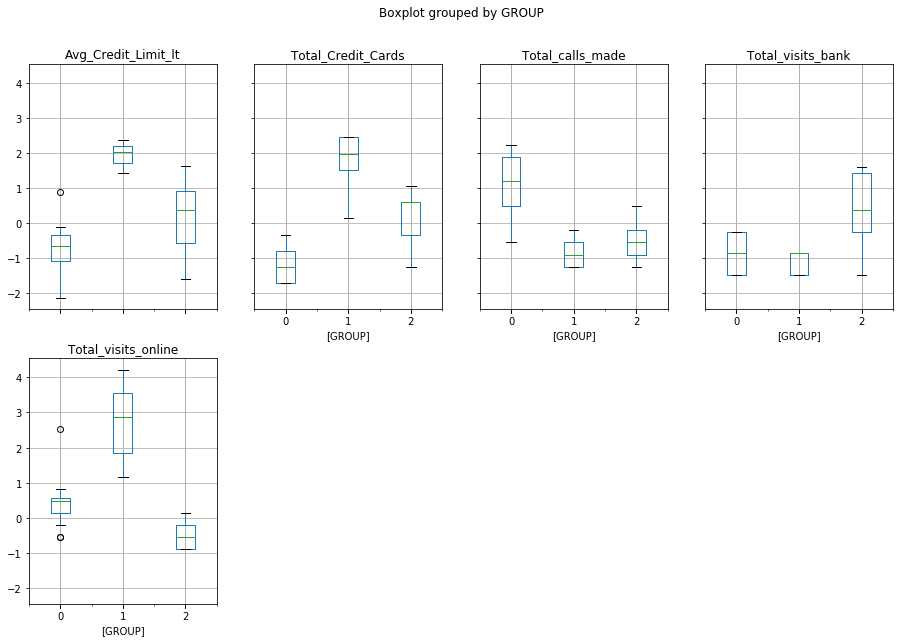

In [215]:
df_data_attr_sc.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

Note:

The hierarchial clustering gives the same boxplot as the K-means clustering (note group 0 and 2 are switched around).

Draw silhouette plots for 3 and 4 clusters.

In [216]:
model_four = AgglomerativeClustering(n_clusters=4, affinity='euclidean',  linkage='average')
model_four.fit(df_data_attr_sc)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=4)

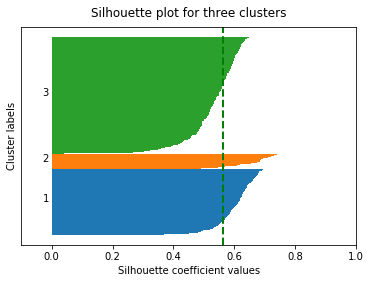

In [217]:
fig, ax1 = plt.subplots(1)
# Get silhouette samples
labels = model_three.labels_
silhouette_vals = silhouette_samples(df_data_attr_sc, labels)

# Silhouette plot
y_ticks = []
y_lower, y_upper = 0, 0
for i, cluster in enumerate(np.unique(labels)):
    cluster_silhouette_vals = silhouette_vals[labels == cluster]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
    ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
    y_lower += len(cluster_silhouette_vals)
    
# Get the average silhouette score and plot it
avg_score = np.mean(silhouette_vals)
ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
ax1.set_yticks([])
ax1.set_xlim([-0.1, 1])
ax1.set_xlabel('Silhouette coefficient values')
ax1.set_ylabel('Cluster labels')
ax1.set_title('Silhouette plot for three clusters', y=1.02);

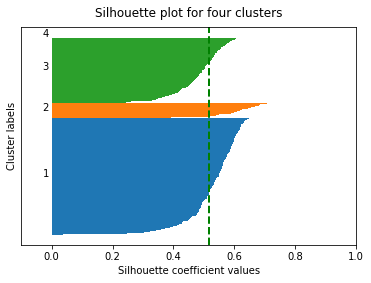

In [218]:
fig, ax1 = plt.subplots(1)
# Get silhouette samples
labels = model_four.labels_
silhouette_vals = silhouette_samples(df_data_attr_sc, labels)

# Silhouette plot
y_ticks = []
y_lower, y_upper = 0, 0
for i, cluster in enumerate(np.unique(labels)):
    cluster_silhouette_vals = silhouette_vals[labels == cluster]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
    ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
    y_lower += len(cluster_silhouette_vals)
    
# Get the average silhouette score and plot it
avg_score = np.mean(silhouette_vals)
ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
ax1.set_yticks([])
ax1.set_xlim([-0.1, 1])
ax1.set_xlabel('Silhouette coefficient values')
ax1.set_ylabel('Cluster labels')
ax1.set_title('Silhouette plot for four clusters', y=1.02);

### Key questions - answers

1.	How many different segments of customers are there?

    The best approach would be to group the customers into three groups.


2.	How are these segments different from each other?


Note: the group names are as per the K-means clustering. The hierachical clustering gives the same result, but group 0 and group 2 are switched around.

Group 0 - highest visits to the bank, lowest visits online. This group could possibly be older clients, who prefer to visit the bank rather than using online channels.<br>
Group 1 - highest average credit limit, most credit cards, highest visits online, lowest visits to the bank. Theis group might represent younger clients who have high spending power and are generating lots of debt. They are comfortable using online channels and avoid visits to the bank.<br>
Group 2 - lowest average credit limit, lowest nr credit cards, highest total calls made. These clients are lower spenders, they do not make use of much credit. They have significantly more calls to the bank, which might indicate that they are the group that are reporting poor service.<br>

3.	What are your recommendations to the bank on how to better market to and service these customers?

1: Group 0 can be trageted with marketing about the online channels available, and the convenience of online banking. They might also be incentivised to reduce visits to the bank, annd rather use online services.<br>
2: Group 1 might be trageted with investment and savings products to encourage more savings and investment. New online banking products can also be marketed to this group since they are comfortable with online banking.<br>
3: Group 2 can be targeted for service delivery surveys and service call follow-ups. They might also be trageted with marketing on credit cards since they are currenlty not making use of this much. They also have relativly low use of online banking, therfore they can also be targeted with marketing for the online banking service.<br>


More data should be collected to determine the characteristics of the clients in these clusters. Once this is known, a model can be build that could identify potential new customers as one of these groups, and the marketing efforts for that group can be targeted to those potential new customers.